# Credit Card Fraud Detection with Python
![credit card fraud](credit%20card%20fraud.webp)
## Business Problem: 
When it comes to credit card fraud, everyone pays the price. Consumers and the businesses that serve them all suffer from fraudulent activity. And the costs can be staggering. Global financial losses related to payment cards are estimated to reach $34.66 billion in 2022. Everyone along the payment lifecycle is impacted by a fraudulent transaction—from the consumer who makes purchases in person or online using a credit or debit card to the merchant who finalizes that purchase.



## Project Tasks:
-  Perform an exploratory data analysis to the training data to understand which features might be correlated to fraudulent activities.
-   Create models with those features and test out their predicitve effectiveness. 

## The Dataset:
The dataset is from Kaggle.
https://www.kaggle.com/datasets/kartik2112/fraud-detection?sort=recent-comments
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. 
(Thanks to Brandon Harris for his amazing work in creating this easy-to-use simulation tool for creating fraud transaction datasets.)
There are 23 columns and 1,296,675 rows. 
- "Unnamed:0" id of the record
- trans_date_trans_time
- cc_num: 
- merchant: merchat name
- category: transaction category
- amt: transaction amount
- first: first name
- last: last name
- gender: "F" , "M"
- street: street address
- city
- state
- zip: zip code
- lat: latitudinal
- long: longitudinal
- city_pop: city population
- job: career
- trans_num: transaction number
- unix_time: unix format time stamp
- merch_lat: latitudinal of merchant
- merch_long: longitudinal of merchant
- is_fraud: fraudulent transactions as 1 and non-fraudulent as 0


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # For Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier # For Desicion Tree Classification Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classification Model
from xgboost import XGBClassifier # For XGBoostClassification Model
from sklearn.model_selection import GridSearchCV # For hyperparameters tuning
from sklearn.preprocessing import LabelEncoder # For converted categorical variables to numerical variables
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score


## Data Validation

In [16]:
fraud = pd.read_csv('fraud.csv')
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
fraud.info()
# no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [18]:
fraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [19]:
fraud.shape

(1296675, 23)

## Exploratory Data Analysis & Feature Engineering


### Target Variable: is_fraud

0.005788651743883394

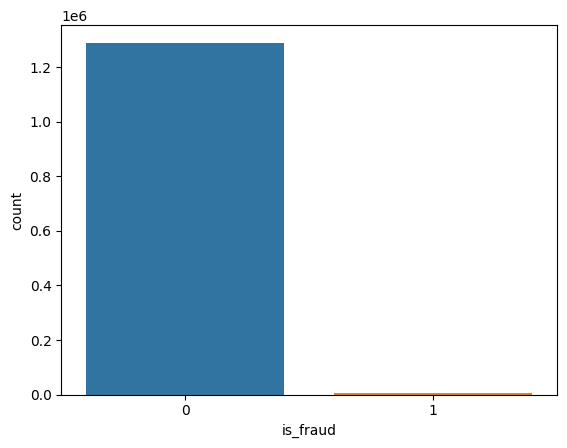

In [20]:
# Target Variable - is_fraud
sns.countplot(x = 'is_fraud', data = fraud)
fraud.is_fraud.mean()
# The fraud rate is 0.58%. It is an imbalanced dataset.

### Categorical Variables: merchant, cetegory, gender, city, state,job, trans_week_day,trans_hour

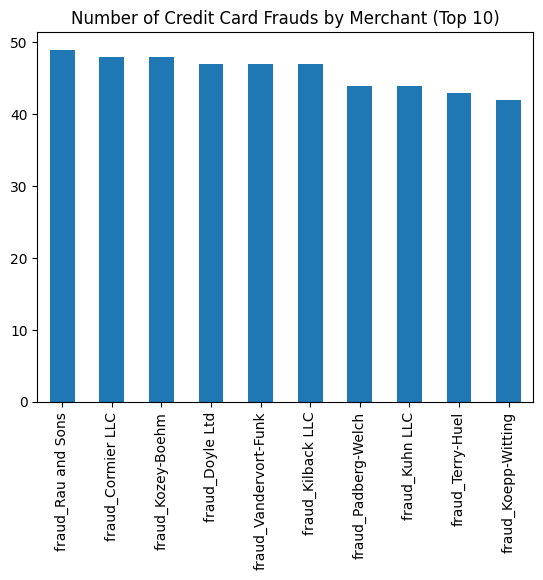

fraud_Rau and Sons        49
fraud_Cormier LLC         48
fraud_Kozey-Boehm         48
fraud_Doyle Ltd           47
fraud_Vandervort-Funk     47
                          ..
fraud_Kuphal-Toy           1
fraud_Eichmann-Kilback     1
fraud_Lynch-Mohr           1
fraud_Tillman LLC          1
fraud_Hills-Olson          1
Name: merchant, Length: 679, dtype: int64

In [21]:
# merchant
fraud[fraud.is_fraud == 1].merchant.value_counts(sort =True, ascending = False).head(10).plot(kind = 'bar')
plt.title("Number of Credit Card Frauds by Merchant (Top 10)")
plt.show()
fraud[fraud.is_fraud == 1].merchant.value_counts()
# Insight: merchant could be a predictor, fraud_Rau and Sons, Fraud Cormier LLC have fraud_Kozey-Boehm.. have higher fraud activities. 

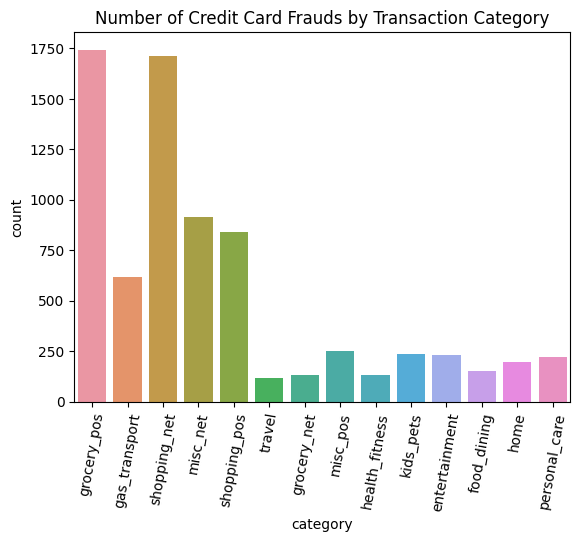

In [22]:
# category:
sns.countplot(x= 'category',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Frauds by Transaction Category")
plt.xticks(rotation=80)
plt.show()

# Insight: category could be a good predictor. shoping_net and grocery_pos seem to have relative higher fraud acitivites.

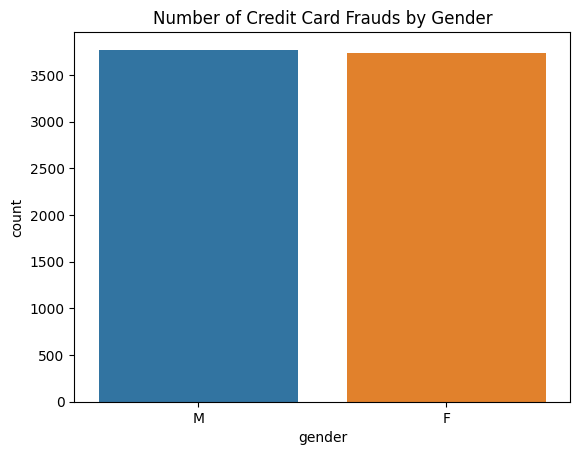

In [23]:
# Gender
sns.countplot(x= 'gender',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Frauds by Gender")
plt.show()
# Insight: hard to tell the difference from gender

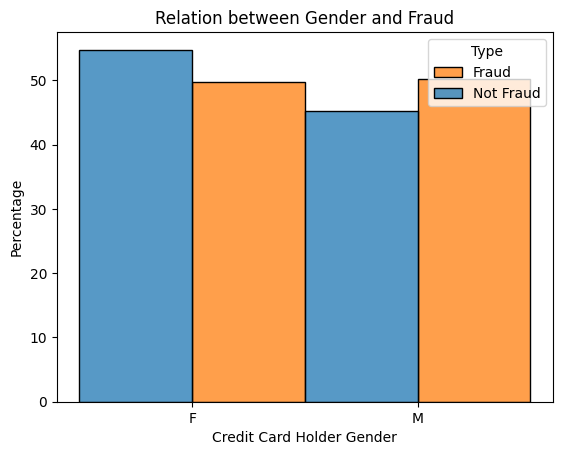

In [24]:
#Relation between Gender and Fraud
ax=sns.histplot(x='gender',data=fraud, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Relation between Gender and Fraud")
plt.show()

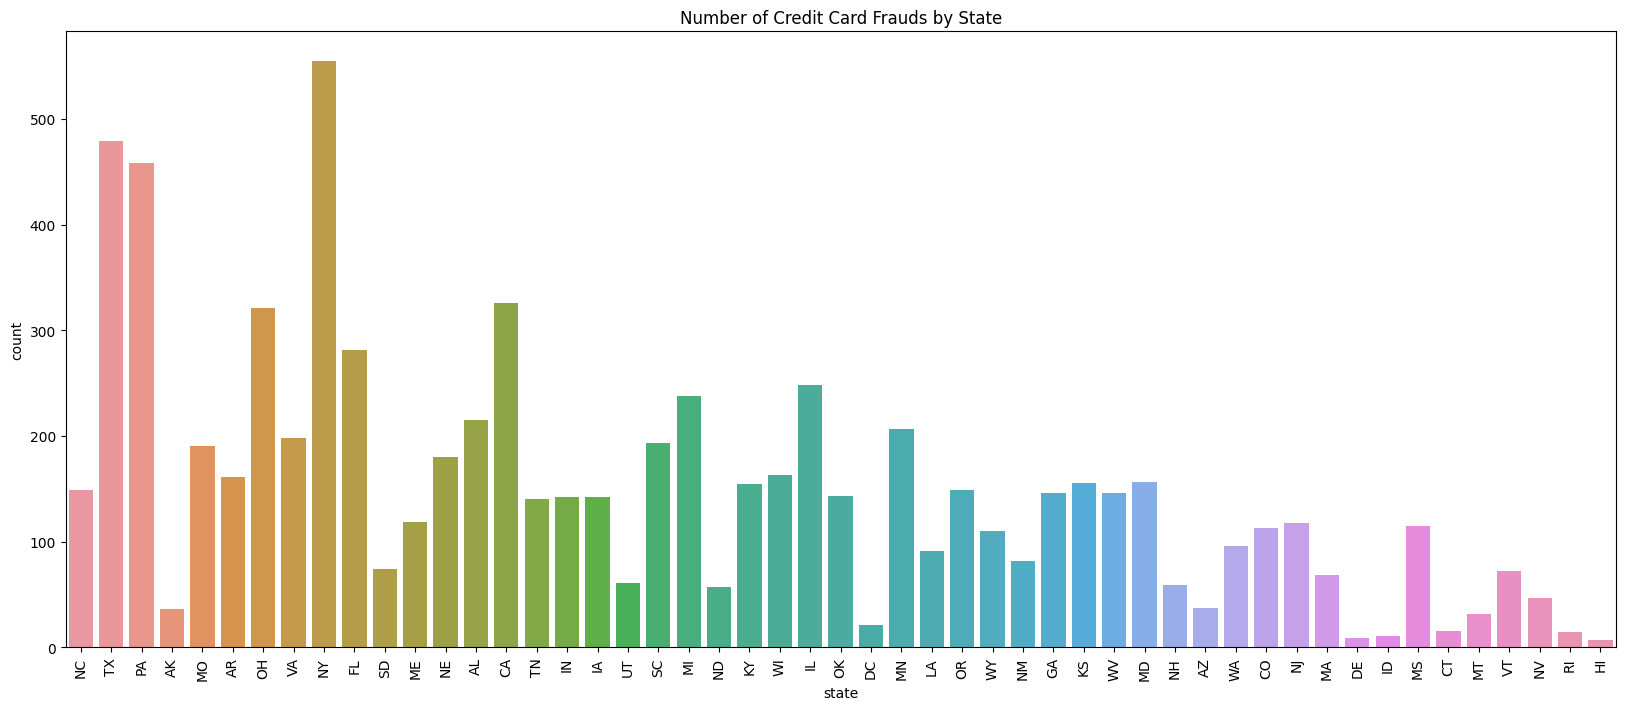

In [25]:
# State
plt.figure(figsize=(20,8))
sns.countplot(x= 'state',data = fraud[fraud.is_fraud == 1])
plt.xticks(rotation=90)
plt.title("Number of Credit Card Frauds by State")
plt.show()
# Insight: state could be a good predictor. States NY, TX,PA report the most number of fraud.

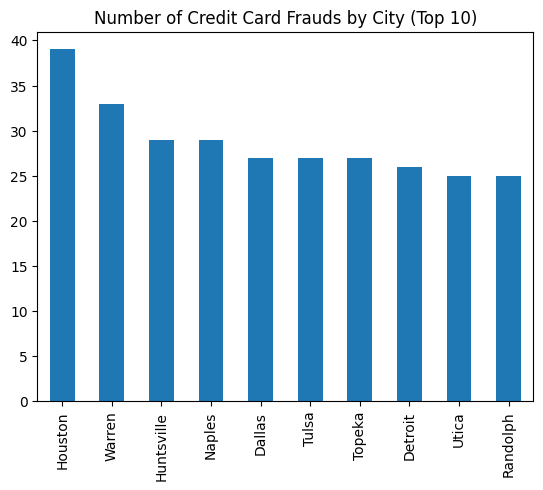

Houston           39
Warren            33
Huntsville        29
Naples            29
Dallas            27
                  ..
Florence           3
Kilgore            2
Phoenix            2
Phenix City        2
Denham Springs     2
Name: city, Length: 702, dtype: int64

In [26]:
# City:
fraud[fraud.is_fraud == 1].city.value_counts(sort =True, ascending = False).head(10).plot(kind = 'bar')
plt.title("Number of Credit Card Frauds by City (Top 10)")
plt.show()
fraud[fraud.is_fraud == 1].city.value_counts()
# Insight:city could be a good predictor. Cities Houston, Warren, Huntsville report the most number of fraud.

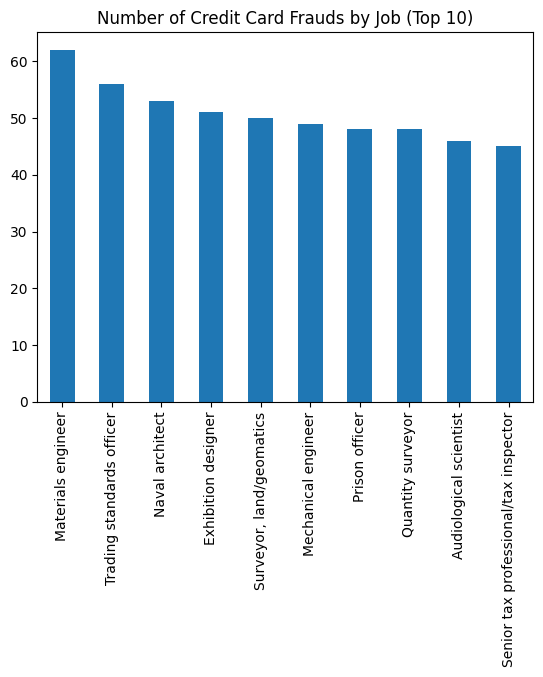

Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: job, Length: 443, dtype: int64

In [28]:
# Job
fraud[fraud.is_fraud == 1].job.value_counts(sort =True, ascending = False).head(10).plot(kind = 'bar')
plt.title("Number of Credit Card Frauds by Job (Top 10)")
plt.show()
fraud[fraud.is_fraud == 1].job.value_counts()
# Insight: Job could be a good predictor. Materials engineer, Trading starndards officer, Navel architect report the most number of fraud.

In [29]:
# Generate some new Categorical Variables:
# convert trans_data_trans_time from str to datatime format
fraud['trans_date'] = pd.to_datetime(fraud['trans_date_trans_time'], format = "%Y-%m-%d %H:%M:%S")

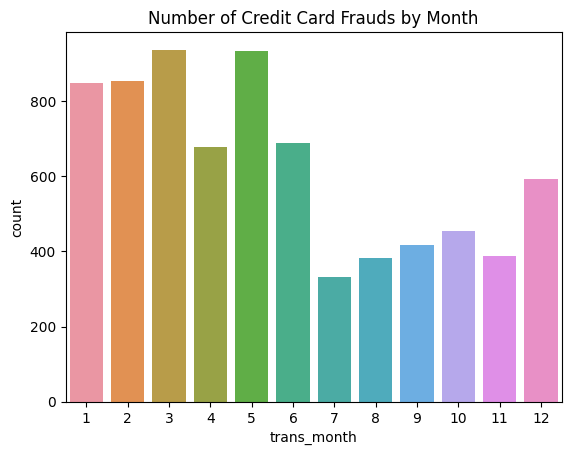

In [31]:
# extract the transaction month of the year
fraud['trans_month'] = fraud['trans_date'].dt.month
sns.countplot(x= 'trans_month',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Frauds by Month")
plt.show()
# Insight: trans_month could be a predictor.

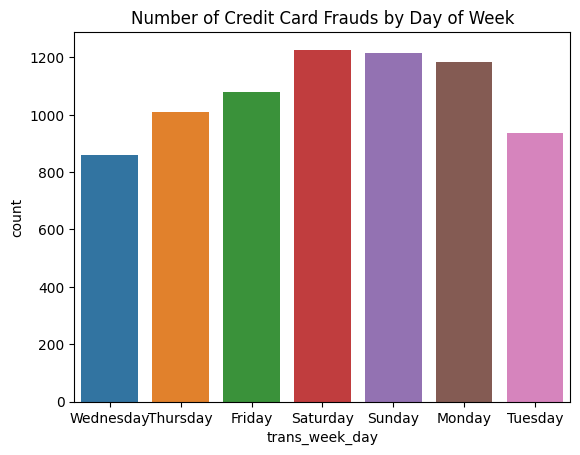

In [30]:
# extract the transaction day of week
fraud['trans_week_day'] = fraud['trans_date'].dt.day_name()
sns.countplot(x= 'trans_week_day',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Frauds by Day of Week")
plt.show()

#Insight: trans_week_day could be a good predictor, Saturday, Sunday,Monday report the most number of fraud.

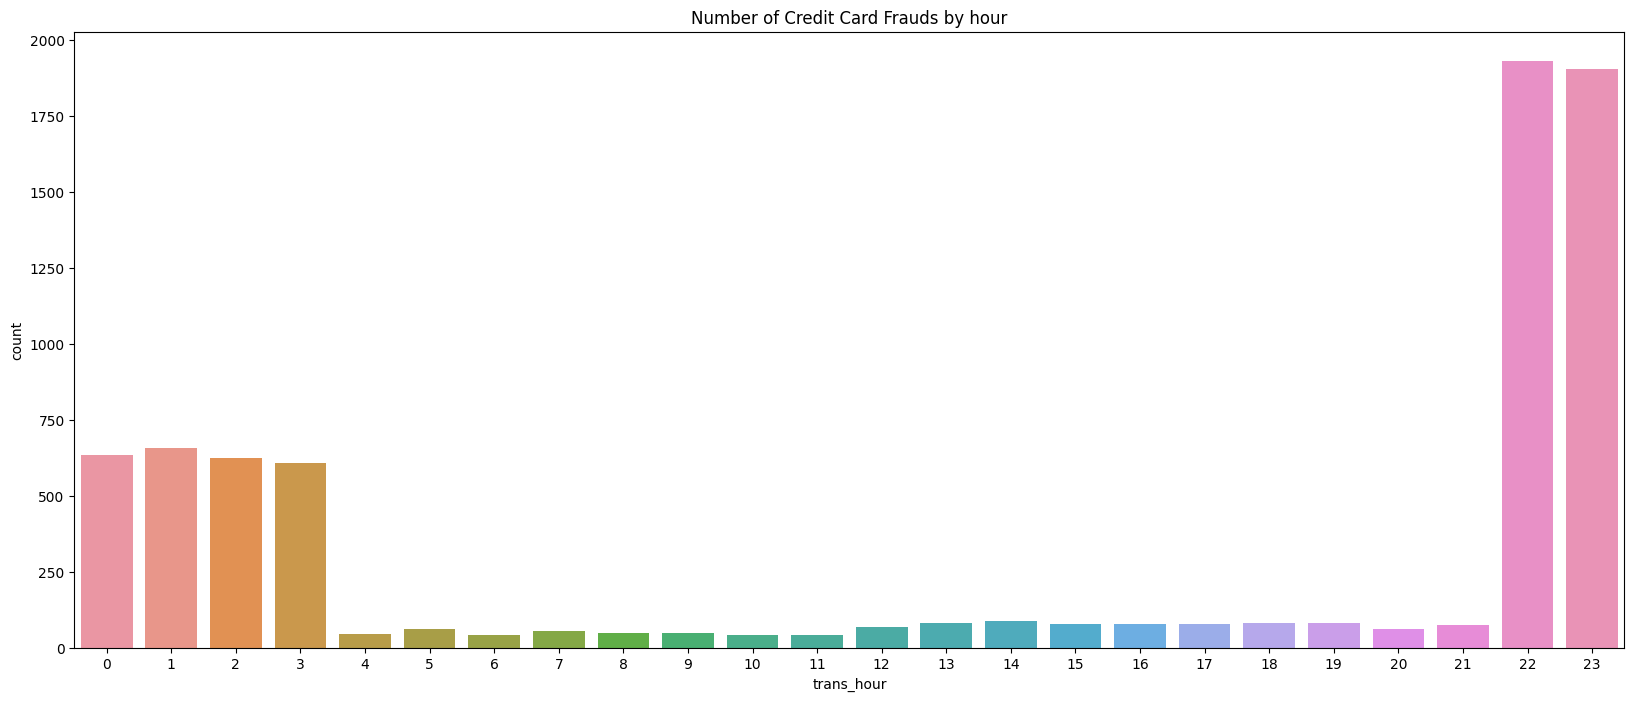

In [32]:
# extract the transaction hour of day
fraud['trans_hour']=fraud['trans_date'].dt.hour
plt.figure(figsize=(20,8))
sns.countplot(x= 'trans_hour',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Frauds by hour")
plt.show()
#Insight: trans_hour could be a good predictor, Hours of 22, 23, 0, 1, 2, 3 report the most number of fraud.

### Numerical Variables: amt, lat, long, dob, merch_lat, merch_long


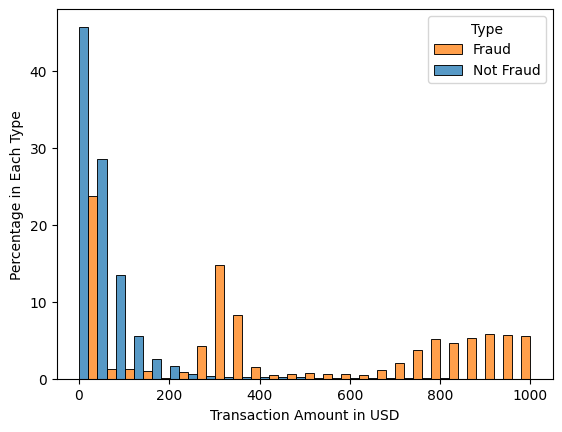

In [33]:
#amount vs fraud
ax=sns.histplot(x='amt',data=fraud[fraud.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
# Insight: amount could be a good predictor

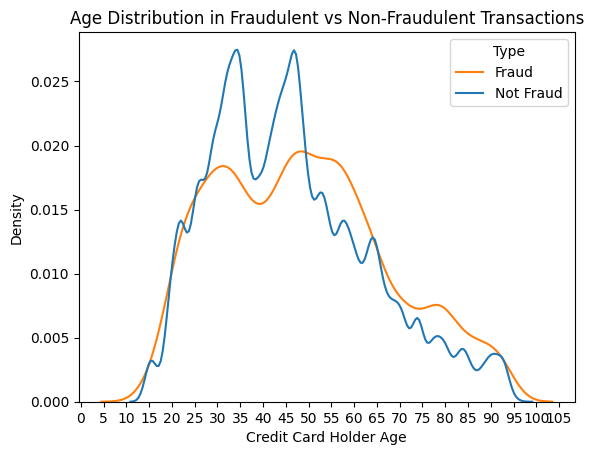

In [34]:
#age
fraud['age']=fraud['trans_date'].dt.year-pd.to_datetime(fraud['dob']).dt.year
ax=sns.kdeplot(x='age',data=fraud, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()


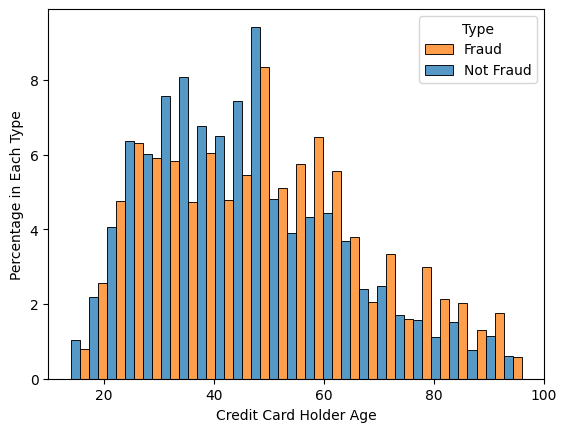

In [35]:
ax=sns.histplot(x='age',data=fraud,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Credit Card Holder Age')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()
# Insight: Age could be a predictor.

In [36]:
pip install h3

  Using cached h3-3.7.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
# calculate distanc by using lat, long, merch_lat, merch_long
# need Latitude and Longitude to calculate the distance between two locations with following formula: =acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371 

import h3
fraud['distance']= fraud.apply(lambda row: h3.point_dist((row['lat'],row['long']),(row['merch_lat'],row['merch_long'])),axis=1)

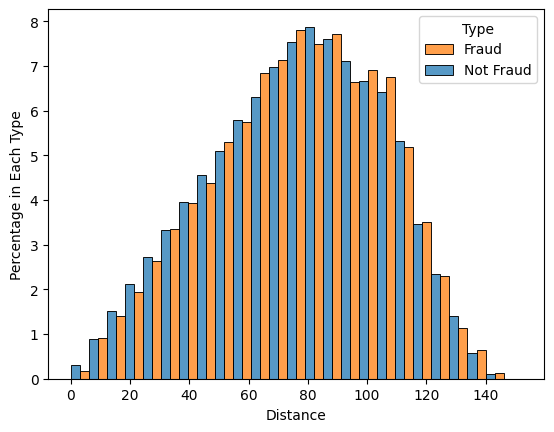

In [38]:
ax=sns.histplot(x='distance',data=fraud,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Distance')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()
# Insight: distance could be a predictor.


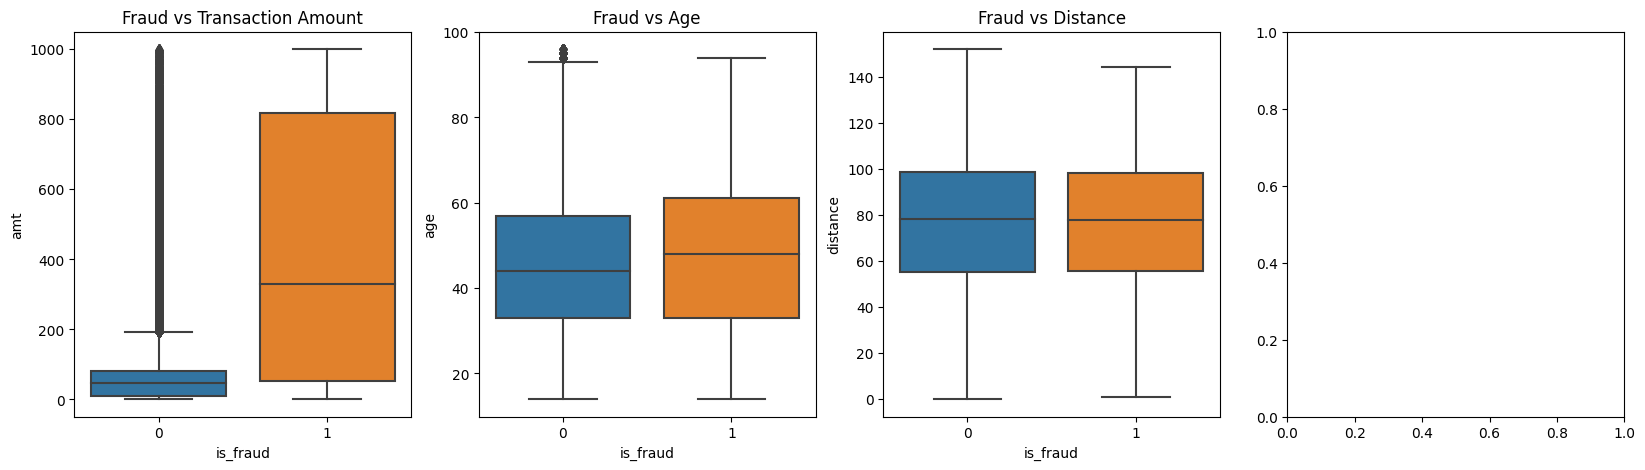

In [46]:
fig, axes = plt.subplots(1,4,figsize=(20,5))
sns.boxplot(x =fraud.is_fraud,y=fraud[fraud.amt<=1000].amt, ax=axes[0]).set(title='Fraud vs Transaction Amount')
sns.boxplot(x =fraud.is_fraud,y=fraud.age,  ax=axes[1]).set(title='Fraud vs Age')
sns.boxplot(x =fraud.is_fraud,y=fraud.distance, ax=axes[2]).set(title='Fraud vs Distance')
plt.show()

### Preprocessing Data

In [44]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  object        
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [48]:
### prepare data for modeling

# convert categorixal vaiable to numerical format
labelencoder = LabelEncoder()
fraud['merchant']=labelencoder.fit_transform(fraud['merchant'])
fraud['category']=labelencoder.fit_transform(fraud['category'])
fraud['gender']=labelencoder.fit_transform(fraud['gender'])
fraud['city']=labelencoder.fit_transform(fraud['city'])
fraud['state']=labelencoder.fit_transform(fraud['state'])
fraud['job']=labelencoder.fit_transform(fraud['job'])
fraud['trans_week_day']=labelencoder.fit_transform(fraud['trans_week_day'])


In [51]:
feature_cols = ['merchant','category', 'gender','city', 'state', 'job','trans_month','trans_week_day','trans_hour','age','distance','amt']
X = fraud[feature_cols] # Features
y = fraud['is_fraud'] # Target variable

# define the scaler 
scaler = MinMaxScaler()
# fit and transform the train set
X[['age', 'distance','amt']] = scaler.fit_transform(X[['age', 'distance','amt']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Fitting & Evaluation

In [59]:
# Decision Tree
# Create Decision Tree classifer object
dtm = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
dtm = dtm.fit(X_train,y_train)

In [65]:
#Predict the response for test dataset
# select the right threshold to make sure the recall of "0" category is around 80 and accuaracy is 0.45.
threshold = 0.688
y_pred = dtm.predict(X_test)

dtm_matrix = metrics.confusion_matrix(y_test, y_pred)
print(dtm_matrix)
dtm_report = metrics.classification_report(y_test,y_pred)
print(dtm_report)

[[386590    128]
 [   851   1434]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.92      0.63      0.75      2285

    accuracy                           1.00    389003
   macro avg       0.96      0.81      0.87    389003
weighted avg       1.00      1.00      1.00    389003



Text(0.5, 1.0, 'Feature Importance in Decision Tree Model')

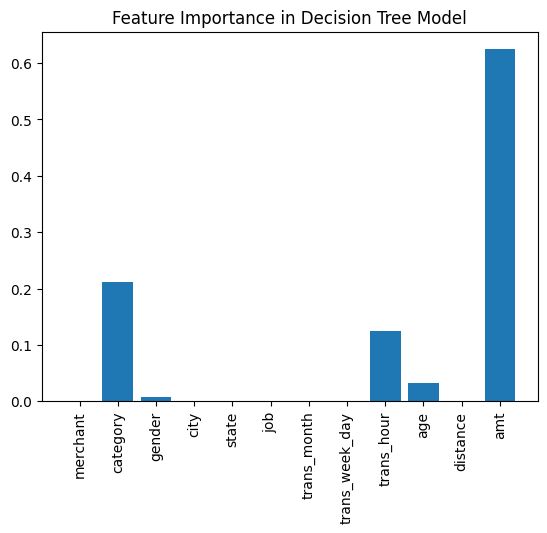

In [66]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = dtm.feature_importances_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Decision Tree Model')

In [63]:
# logisticRegression

lg = LogisticRegression(random_state= 42)
lg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [67]:
y_pred2 =lg.predict(X_test)
lg_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(lg_matrix)

lg_report = metrics.classification_report(y_test,y_pred2)
print(lg_report)

[[386718      0]
 [  2285      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386718
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



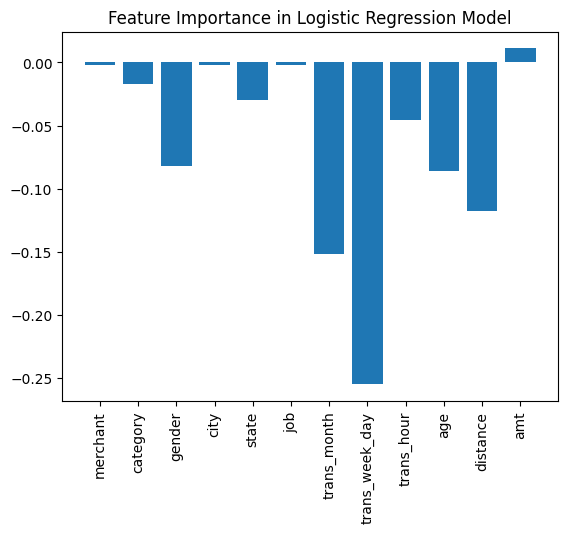

In [68]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = lg.coef_[0][i]  
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

In [75]:
# Random Forest Model
rf = RandomForestClassifier(random_state = 42, n_estimators=500,bootstrap = True, max_depth=6,criterion='entropy')
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=500,
                       random_state=42)

In [77]:
y_pred3 = rf.predict(X_test)
rf_matrix = metrics.confusion_matrix(y_test, y_pred3)
print(rf_matrix)

rf_report = metrics.classification_report(y_test,y_pred3)
print(rf_report)

[[386711      7]
 [  1523    762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.99      0.33      0.50      2285

    accuracy                           1.00    389003
   macro avg       0.99      0.67      0.75    389003
weighted avg       1.00      1.00      1.00    389003



Text(0.5, 1.0, 'Feature Importance in Random Forest Model')

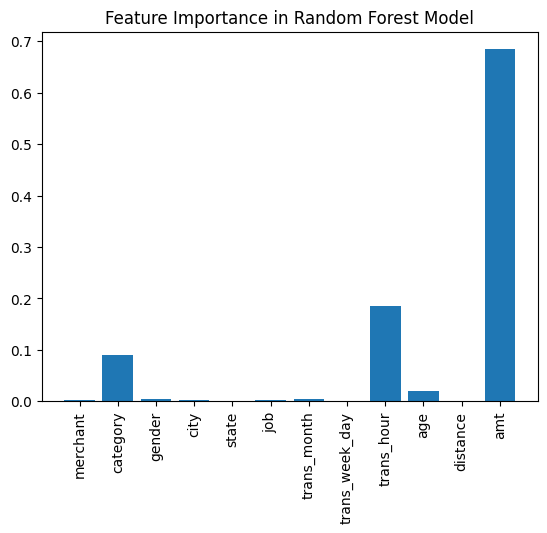

In [78]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = rf.feature_importances_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Random Forest Model')

## Model Comparison

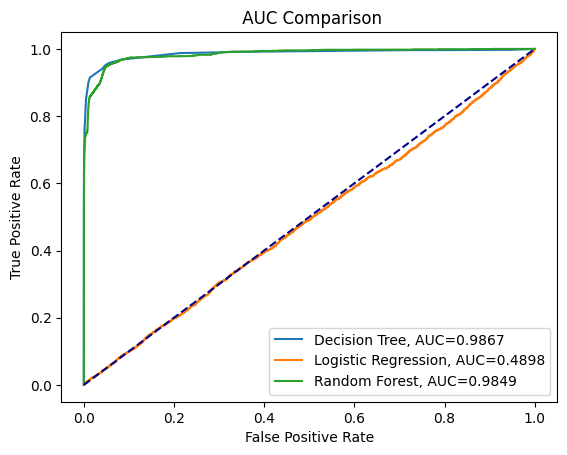

In [79]:
#set up plotting area
plt.figure(0).clf()
#fit decisiom tree model and plot ROC curve
y_pred = dtm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit logistic regression model and plot ROC curve
y_pred = lg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit random forest model and plot ROC curve

y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title(" AUC Comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#add legend
plt.legend()

References:
1. https://www.ncr.com/blogs/payments/credit-card-fraud-detection
2. https://www.kaggle.com/datasets/kartik2112/fraud-detection
